# Heat Equation
The heat equation is an example of parabolic equations. The problem states: find $u:\Omega \times [0,T] \to \mathbb{R}$ such that

\begin{align*}
    \frac{\partial u}{\partial t}(x,t) - \Delta u(x,t) &= f(x,t) \;\;\; \forall x \in \Omega, \; \forall t \in (0,T),\\
                                                u(x,0) &= u_{0}(x) \;\;\; \forall x \in \Omega, \\[.5em]
                                                u(x,t) &= u_{D}(x,t) \;\;\; \forall x \in \partial\Omega, \forall t \in (O,T].
\end{align*}

where $f$ is a given heat source term, $\Omega \subset \mathbb{R}^{d}, \; d=2,3,...$ is the spatial domain and $[0,T]$ is the time interval. We also need the initial conditions

\begin{equation*}
    u(x,0) = u_{0}(x), \;\;\; \forall x \in \Omega,
\end{equation*}

and some Dirichlet boundary conditions that read as

\begin{equation*}
    u(x,t) = u_{D}(x,t), \;\;\; \forall x \in \partial \Omega, \; \forall t \in (0,T].
\end{equation*}

## Variational Formulation in space

In order to obtain the weak formulations, we do the following only for the spatial variables $x$, for all $t \in (0,T)$. Thus, the test function $v$ depends only on the spatial variable. We multiply by $v$, integrate over $\Omega$ and perform integration by parts to obtain:

\begin{equation*}
    \int_{\Omega} \frac{\partial u}{\partial t}(x,t) v(x) \, dx
    +
    \int_{\Omega} \nabla u(x,t) \nabla v(x) \, dx
    =
    \int_{\Omega} f(x,t) v(x) \, dx,
    \;\;\;
    \forall v \in H_{0}^{1}(\Omega), \; \forall t \in (0,T).
\end{equation*}

The initial condition in $L_{2}$ is set for $t=0$:

\begin{equation*}
    u(\cdot, 0) = u_{0} \;\; \text{in} \; L_{2}(\Omega).
\end{equation*}

Since $u \in H^{1}(\Omega)$, where $H^{1}$ is a Hilbert space, and thus, $u: [0,T] \to H^{1}(\Omega)$. Then, we have the following ordinary differential eqauation expression:

\begin{equation*}
    \frac{du}{dt}(t) + Au(t) = f(t).
\end{equation*}

## Galerkin Method in Space

For our discrete solution, we use the finite element method in space. Let $V_{h}$ be a finite element subspace of $H^{1}(\Omega)$, with basis functions $\{ p_{1}(x), \dots, p_{n}(x) \}$. We approximate the time-dependent function by

\begin{equation*}
    u_{h}: [0,T] \to V_{h},
\end{equation*}

which can be expressed as a linear combination of the basis functions as follows

\begin{equation*}
    u_{h}(t) = \sum_{i=1}^{n} u_{i}(t)p_{i}(x)
\end{equation*}

Inserting the above expansion into the variational formulation, and using spatial test functions $v=p_{j}$ we obtain the semi-discrete equation:

\begin{equation*}
    \int_{\Omega} \frac{\partial}{\partial t} \left\{ \sum_{i=1}^{n} u_{i}(t) p_{i}(x) \right\} p_{j}(x) \, dx
    +
    \int_{\Omega} \nabla \left\{ \sum_{i=1}^{n} u_{i}(t) p_{i}(x) \right\} \nabla p_{j}(x) \, dx
    =
    \int_{\Omega} f(x,t) p_{j}(x) \, dx,
    \;\;\;
    \forall j = 1, \dots, n, \; \forall t \in (0,T].
\end{equation*}

The initial condition for $u_{h}$ is obtained by some kind of projection. Typically, we want the L^{2} projection

\begin{equation*}
    \int u_{h}(x,0)p_{j}(x) \, dx = \int u_{0}(x)p_{j}(x) \, dx, \;\;\; \forall j \in \{ 1, \dots, n \}.
\end{equation*}

By means of the **mass matrix** $M \in \mathbb{R}^{n \times n}$

\begin{equation*}
    M = \left\{ \int_{\Omega} p_{i}p_{j} \, dx \right\}_{i,j = 1, \dots, N}
\end{equation*}

and **stiffness matrix** $A \in \mathbb{R}^{n \times n}$

\begin{equation*}
    A = \left\{ \int_{\Omega} \nabla p_{i} \nabla p_{j} \, dx \right\}_{i,j = 1, \dots, n}
\end{equation*}

we obtain the ordinary differential equation (ODE)

\begin{equation*}
    M \dot{u}(t) + A u(t) = f(t) \;\;\; \forall t.
\end{equation*}

including the initial condition

\begin{equation*}
    u(0) = u_{0}.
\end{equation*}

## Implicit Euler time-stepping

We approximate the function $u$ at time-steps $t_{j} = j\tau$ by $u^{j}$, with time steps $\tau$ and $j \in \{ 0, \dots, m \}. By replacing the time derivative $\dot{u}$ by the backward difference quotient we obtain

\begin{equation*}
    M \frac{u^{j}-u^{j-1}}{t_{j}-t_{j-1}} + Au^{j} = M \frac{u^{j}-u^{j-1}}{\tau} + Au^{j}
    =
    f^{j}
\end{equation*}

The initial value $u^{0}:=u_{0}$ is given by the initial condition. If the old time-step solution $u^{j-1}$ is known, we can compute the next step by the linear system of equations

\begin{equation*}
    (M + \tau A)u^{j} = \tau f + Mu^{j-1}.
\end{equation*}

Often the new step is computed in incremental form:

\begin{align*}
    (M + \tau A)w^{j} &= f-Au^{j-1}\\
                u^{j} &= u^{j-1} + \tau w^{j}.
\end{align*}

In [1]:
#Load all the necessary packages

import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
import math
from ngsolve import *
from ngsolve.webgui import Draw
from netgen.occ import unit_square
from time import sleep

In [2]:
mesh = Mesh(unit_square.GenerateMesh(maxh=0.05))

#snap_dict = dict()

tau = 0.005
tend = 0.1
u0 = exp(-100*( (x-0.5)**2 + (y-0.5)**2))

fes = H1(mesh, order=3, dirichlet="bottom|right|left|top")
u, v = fes.TnT()

mform = u*v*dx #mass matrix
M = BilinearForm(mform).Assemble()
rows, cols, vals = M.mat.COO()
M_array = sp.csr_matrix((vals, (rows, cols)))

aform = grad(u)*grad(v)*dx #stiffness matrix
A = BilinearForm(aform).Assemble()
rows, cols, vals = M.mat.COO() 
A_array = sp.csr_matrix((vals, (rows, cols)))

M_star = BilinearForm(mform+tau*aform).Assemble()
rows, cols, vals = M_star.mat.COO()
M_star_array = sp.csr_matrix((vals, (rows, cols)))

M_starinv = M_star.mat.Inverse()

f = LinearForm(fes).Assemble() #assembly of the linear form

gfu = GridFunction(fes) #grid function for storing the results
gfu.Set(u0)

scene = Draw(gfu, deformation=True)
sleep(3)

m = gfu.vec.size
n = int(tend/tau)

Y_ex = np.zeros((m,n)) #snapshot matrix
Y_ex[:, 0] = gfu.vec.data

#vtk = VTKOutput(mesh, coefs=[gfu], names=["sol"], filename="sols/u_approx/uh_sol", subdivision=2)
#vtk.Do(time=tau)

#----Here starts the implicit Euler time-stepping----#
for j in range(1, int(tend/tau)):
    res = f.vec-A.mat*gfu.vec
    w = M_starinv*res
    gfu.vec.data += tau*w
    Y_ex[:, j] = gfu.vec.data
    #vtk.Do(time = (j+1)*tau)
    scene.Redraw()
    sleep(0.2)
np.savez('snaps/snapshots.npz', Y_ex=Y_ex)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

## Reduced Matrix Computation via the Proper Orthogonal Decomposition (POD)

First of all we need to generate a basis $V$ of order $r \ll n$ for our reduced order model (ROM), which preserves the majority of the information of the full order model (FOM). This basis is generated via the POD and the procedure is as follows:

1. Assembly of the correlation matrix.
2. Compute the eigenvalues/-vectors of the correlation matrix.
3. Determine the order of the POD basis of size $r$.
4. Calculate the POD basis column vectors from the eigenvalues/-vectors of the correlation matrix.

For our computations though, we will use a slightly different approach which has the same result as the above procedure. We will use the Singular Value Decomposition (SVD) on our snapshot matrix in order to obtain the following decomposition:

\begin{equation*}
        S = U \Sigma Z^{T}
\end{equation*}

where $U \in \mathbb{R}^{n \times n}$ and $Z \in \mathbb{R}^{m \times m}$ are orthogonal matrices and $\Sigma =$ diag$(\sigma_{1}, \dots, \sigma_{N}) \in \mathbb{R}^{n \times m}$ with $\sigma_{1} \geq \sigma_{2} \geq \dots \sigma_{N}$. Here $N \leq \min(n, m)$. So, the procedure is now becomes:

1. Decompose the snapshot matrix via the Singular Value Decomposition (SVD).
2. Determine the order of the POD basis of size $r$.
3. Set the first $r$ column vectors of matrix $U$ as the POD basis.

## Criterion for selecting the minimal POD basis dimension

In order to verify whether using a POD method actually makes sense, we need to check whether the eigenvalues of the correlation matrix decay sufficiently fast. In this case, only a small number of POD modes (which contain most of the information) are required to build the reduced order model. So, the energy of FOM is

\begin{equation*}
    \sum_{i=1}^{n} \lambda_{i},
\end{equation*}

where $\{\lambda_{i}\}_{i=1}^{n}$ denote the eigenvalues of the correlation matrix. Our goal is to select the smallest integrer $r \in \mathbb{N}$ so that the energy ratio

\begin{equation*}
    \frac{\sum_{i=1}^{r} \lambda_{i}}{\sum_{i=1}^{n} \lambda_{i}}
\end{equation*}

is larger than a user-defined tolerance $e_{POD}$, e.g. $0.99, \; 0.999, \dots$.

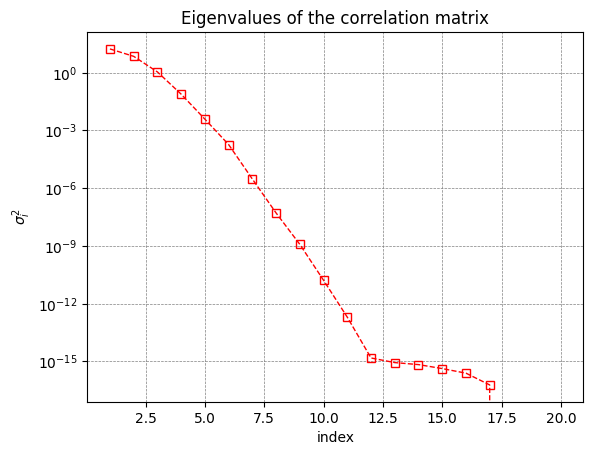

To preserve 0.999 of information, we need 4 POD vector(s). (result: 0.9998407437311436 information).


[np.float64(0.675777782630451), np.float64(0.9537757385021085), np.float64(0.9968336035437071), np.float64(0.9998407437311436)]


In [13]:
correlation_matrix = Y_ex.T @ Y_ex

eigenval, eigenvec = np.linalg.eig(correlation_matrix)
eigenval, eigenvec = eigenval.astype('float64'), eigenvec.astype('float64')
eigenval, eigenvec = eigenval[eigenval.argsort()[::-1]], eigenvec[eigenvec.argsort()[::-1]]

plt.plot(range(1, min(n,m)+1), eigenval, '--rs', linewidth=1, mfc='none')
plt.grid(True, which='both', color='gray', linestyle='--', linewidth=0.5)
plt.yscale("log")
plt.xlabel("index")
plt.ylabel("$\sigma_{i}^{2}$")
plt.title("Eigenvalues of the correlation matrix")
plt.show()

ENERGY_RATIO_TRESHOLD = 0.999
r = np.sum([(eigenval[:i].sum()/eigenval.sum()) < ENERGY_RATIO_TRESHOLD for i in range(n)])
#r = np.sum(eigenval[:1].sum()/eigenval.sum())

print(f"To preserve {ENERGY_RATIO_TRESHOLD} of information, we need {r} POD vector(s). (result: {eigenval[:r].sum()/eigenval.sum()} information).")

energy_list = []
for i in range(r):
    energy_list.append(eigenval[:i+1].sum()/eigenval.sum())
#print('\n')
#print(energy_list)

Finally, the POD basis $V \in \mathbb{R}^{n \times r}$ of dimension $r$ is defined as the set of the first $r$ singular vectors $\zeta_{1}, \dots, \zeta_{r}$ of $U$, or the set of vectors

\begin{equation*}
    \zeta_{j} = \sum_{i=1}^{r} \frac{1}{\sqrt{\lambda_{i}}} S \psi_{j}, \;\;\; 1 \leq j \leq N
\end{equation*}

where $\{\lambda_{j}\}_{i=1}^{r}$ denote the first $r$ eigenvalues of the correlation matrix and $\{\psi_{j}\}_{i=1}^{r}$ denote the first $r$ eigenvectors of the correlation matrix. In our tutorial we selected the first approach.

In [4]:
U, S, _ = np.linalg.svd(Y_ex, full_matrices=True)
#U = np.flip(U, axis=1)
ews = np.flip(S)
pod_basis = U[:,:r]

## Computation of the reduced matrices

We can transform a general FEM matrix $A_{h}\in \mathbb{R}^{n\times n}$, into its reduced order counterpart, by performing the following matrix multiplication

\begin{equation*}
    A_{r} := \underbrace{V^{T}}_{\in \mathbb{R}^{r \times n}}\underbrace{A_{h}}_{\in \mathbb{R}^{n \times n}}\underbrace{V}_{\in \mathbb{R}^{n \times r}} \in \mathbb{R}^{r \times r}.
\end{equation*}

Simirarly, for a general FEM vector $v_{h}\in \mathbb{R}^{n}$, we get its reduced counterpart by performing the following matrix multiplication

\begin{equation*}
    v_{r} := \underbrace{V^{T}}_{\in \mathbb{R}^{r \times n}}\underbrace{v_{h}}_{\in \mathbb{R}^{n}} \in \mathbb{R}^{r},
\end{equation*}

where $V$ is the reduced basis built by the POD algorithm.

## Time Stepping ROM

We now need to apply the reduced basis method to the Euler time-stepping procedure. In particular, we have

\begin{align*}
          \underbrace{M+\tau A}_{M^{*}} u^{j} &= Mu^{j-1} + \tau f^{j}\\[0.5em]
                                   M^{*}u^{j} &= Mu^{j-1} + \tau f^{j}\\[0.5em]
    V^{T}M^{*}\underbrace{u^{j}}_{Vu_{r}^{j}} &= V^{T}(M\underbrace{u^{j-1}}_{Vu_{r}^{j-1}} + \tau f^{j})\\[0.5em]
                         V^{T}M^{*}Vu_{r}^{j} &= V^{T}MVu_{r}^{j-1} + V^{T}\tau f^{j}
\end{align*}

Moreover, the initial condition stays the same as $u_{0} = u(\cdot, 0)$ and we set $u_{r}^{0} = Vu_{0}$.

In [5]:
for j in range(1, r+1):

    V = pod_basis[:,:j]
    
    u_0 = CoefficientFunction(exp(-100*( (x-0.5)**2 + (y-0.5)**2)))
    w = GridFunction(fes)
    w.Set(u_0)
    u_old = V.T @ w.vec.FV().NumPy()[:]

    reduced_system_matrix = V.T @ M_star_array @ V

    scene = Draw(w, deformation=True)

    Y_red = np.zeros((m,n))
    Y_red[:, 0] = w.vec.data

    #vtk = VTKOutput(mesh, coefs=[w], names=['sol'], filename='sols/u_red_r4/ur_sol', subdivision=2)
    #vtk.Do(time=tau)

    for i in range(1, int(tend/tau)):
    
        reduced_rhs_matrix = (V.T @ M_array @ V) @ u_old + tau* V.T @ f.vec.FV().NumPy()[:]
        u_new = np.linalg.inv(reduced_system_matrix) @ reduced_rhs_matrix
        w.vec.FV().NumPy()[:] = V @ u_new
        #vtk.Do(time=i*tau)
        u_old = u_new
        Y_red[:,i] = w.vec.FV().NumPy()[:]
        scene.Redraw()
        sleep(0.2)
    
    np.savez('snaps/reduced_snapshots_r'+str(j), Y_red=Y_red)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

## Error Analysis

In our last attempt we try to predict the error between the FOM solution $u_{h}^{j}$ and the ROM solution $u_{r}^{j}$ in every time step of the Euler time-stepping procedure. So, we calculate the following

\begin{equation*}
    \|u^{j}-u_{r}^{j}\|_{L^{2}(\Omega)}.
\end{equation*}

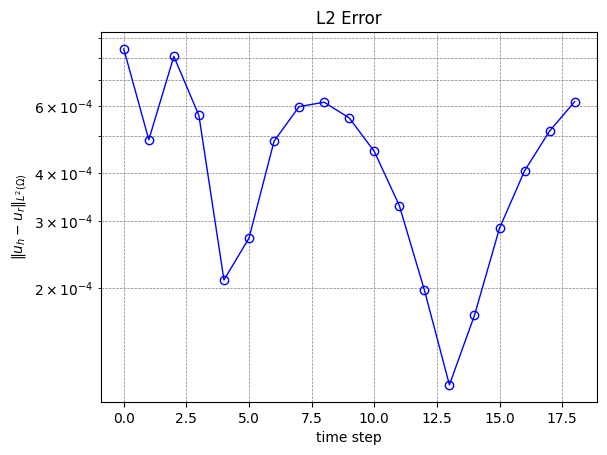

In [8]:
#Error Analysis

u_ex = GridFunction(fes)
u_red = GridFunction(fes)
error = []*(Y_ex.shape[1])
for i in range(1,Y_ex.shape[1]):
    u_ex.vec.FV().NumPy()[:] = Y_ex[:,i]
    u_red.vec.FV().NumPy()[:] = Y_red[:,i]
    diff = u_ex-u_red
    error.append(sqrt(Integrate(diff*Conj(diff), mesh)))
    
plt.plot(error, '-bo', linewidth=1, mfc='none')
plt.grid(True, which='both', color='gray', linestyle='--', linewidth=0.5)
plt.yscale("log")
plt.xlabel("time step")
plt.ylabel("$\|u_{h}-u_{r}\|_{L^{2}(\Omega)}$")
#plt.legend(['time step: 20'])
plt.title("L2 Error")
plt.show()

Finally, we picked a random time-step (in this case the 20th) and we predicted the error between the FOM solution $u_{h}^{j}$ and the reduced solution $u_{r}^{j}$ at that time-step for different values of POD modes. Note that with only $4$ POD modes we managed to accumulate $99.9\%$ of the energy (information) of the system. Thus, we tried different POD bases $V\in \mathbb{R}^{n\times r}$, where $1\leq r \leq4$, and predicted the error

\begin{equation*}
    \|u_{h}^{j} - u_{r}^{j}\|_{L^{2}(\Omega)}
\end{equation*}

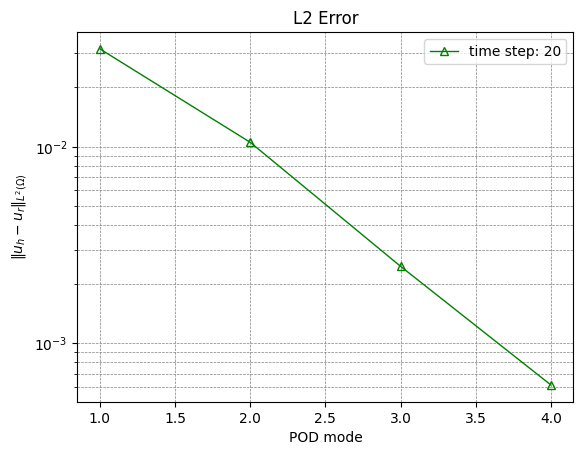

In [12]:
data = np.load('snaps/snapshots.npz')
snaps = data['Y_ex']
error_list = []
u_ex = GridFunction(fes)
u_ex.vec.FV().NumPy()[:] = snaps[:,-1]
#u_ex.vec.FV().NumPy()[:] = Y_ex[:,-1]
u_red = GridFunction(fes)
for i in range(4):
    data_red = np.load('snaps/reduced_snapshots_r'+str(i+1)+'.npz')
    snaps_red = data_red['Y_red']
    u_red.vec.FV().NumPy()[:] = snaps_red[:,-1]
    #u_red.vec.FV().NumPy()[:] = Y_red[:,-1]
    diff = u_ex-u_red
    error_list.append(sqrt(Integrate(diff*Conj(diff), mesh)))

plt.plot(range(1,5), error_list, '-g^', linewidth=1, mfc='none')
plt.grid(True, which='both', color='gray', linestyle='--', linewidth=0.5)
plt.yscale("log")
plt.xlabel("POD mode")
plt.ylabel("$\|u_{h}-u_{r}\|_{L^{2}(\Omega)}$")
plt.legend(['time step: 20'])
plt.title("L2 Error")
plt.show()

The result above shows us the reduction in the error between the FOM solution and the ROM solution as we pick more POD modes. If we take a look at the percentage of energy (information) that is contained in the first $4$ POD modes, in the following table, this result actually makes sense.

| POD Modes | $\%$ of Energy |
| :-------: | :------------: |
| $1$       | $67.57$        |
| $2$       | $95.37$        |
| $3$       | $99.68$        |
| $4$       | $99.98$        |